      corpus prompt_dict  n_few_shot  random_seed sample  precision  rappel  \
0     quaero          en         5.0          1.0      n       0.37    0.33   
1     quaero          en         5.0          2.0      n       0.29    0.35   
2     quaero          en         5.0          3.0      n       0.33    0.29   
3     quaero          en        10.0          1.0      n       0.31    0.32   
4     quaero          en        10.0          2.0      n       0.20    0.28   
...      ...         ...         ...          ...    ...        ...     ...   
1025      wn          en         5.0          2.0      n       0.51    0.61   
1026      wn          en         5.0          3.0      n       0.71    0.79   
1027      wn          en        10.0          1.0      n       0.91    0.91   
1028      wn          en        10.0          2.0      n       0.54    0.61   
1029      wn          en        10.0          3.0      n        NaN     NaN   

        f1 control_beam_search language_tag  
0    

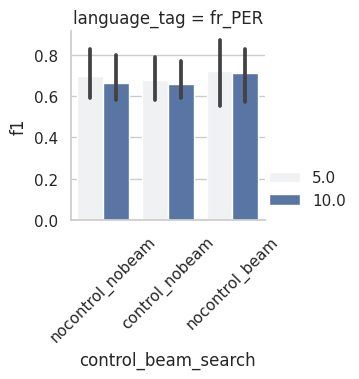

In [14]:
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns

sns.set_theme(style="whitegrid")

pd.set_option('display.max_colwidth', 1600)
pd.set_option('display.max_columns', 100)

#load data
df = pd.read_csv('results.csv')

#rename control column so that n becomes nocontrol and y becomes control
df['control'] = df['control'].replace(['n', 'y'], ['nocontrol', 'control'])
#rename beam_search column so that n becomes nobeam and y becomes beam
df['beam_search'] = df['beam_search'].replace(['n', 'y'], ['nobeam', 'beam'])


#group (control, beam_search) by (y, y) (y, n) (n, y) (n, n) into a new column
df['control_beam_search'] = df['control'] + '_' + df['beam_search']
df = df.drop(columns=['control', 'beam_search'])

#group (language, tag) into a new column
df['language_tag'] = df['language'] + '_' + df['tag']
df = df.drop(columns=['language', 'tag'])

#query the df to get the rows where prompt_dict is en
df = df.query('prompt_dict == "en"')

#print all the df, forcing it to show all the columns
with pd.option_context('display.max_rows', 20, 'display.max_columns', 500):
    print(df)

df = df.query('language_tag == "fr_PER"')


grid = sns.FacetGrid(df, row='language_tag')
grid.map_dataframe(sns.barplot, x='control_beam_search', y='f1', hue='n_few_shot')
grid.add_legend()
#show tilted x labels
plt.xticks(rotation=45)

#show the plot
plt.show()